In [114]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
from bs4 import BeautifulSoup

In [115]:
raw_data = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [116]:
raw_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


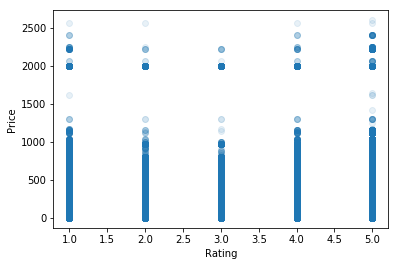

In [117]:
import matplotlib.pyplot as plt
ylabel = raw_data["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = raw_data["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()


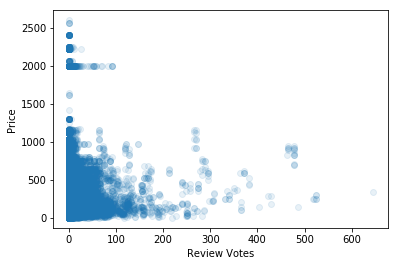

In [118]:
ylabel2 = raw_data["Price"]
plt.ylabel("Price")
xlabel2 = raw_data["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

In [119]:
raw_data = raw_data.reset_index(drop=True)

In [120]:
product_name = []
for item in raw_data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)

In [121]:
print("Total Number of phone models",len(product_name))

Total Number of phone models 4410


In [122]:
raw_data["Brand Name"]
brands = []
for item in raw_data["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)

In [123]:
print("Total Number of Brands in the dataset",len(brands))

Total Number of Brands in the dataset 385


In [124]:
# Top 10 Brands in our dataset
info = pd.pivot_table(raw_data,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(10)

sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     260513        97903  3.962356     1.530069
BLU         239853        58430  3.792262     0.952792
Apple       228346       112280  3.924415     1.998149
LG           86114        23070  3.841460     1.061178
Nokia        64187        25964  3.819291     1.600148
BlackBerry   63126        21114  3.741465     1.279326
Motorola     51157        23107  3.812849     1.777051
HTC          44094        12803  3.465420     1.035506
CNPGD        39176        20151  3.106002     1.638026
OtterBox     35022         2276  4.383778     0.288759

In [125]:
all_reviews = raw_data['Reviews']
all_sent_values = []
all_sentiments = []

In [126]:
analyser = SentimentIntensityAnalyzer()
result = analyser.polarity_scores(sample)
score = result['compound']

In [127]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [128]:
sample = raw_data['Reviews'][8001]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Shipped fast, packaged with ear buds, and power cord plus wall adapter. Looks beautiful, no nicks or scrape and functions great.
Sentiment: 
0.8


In [129]:
for i in range(0,4000):
    all_sent_values.append((sentiment_value(all_reviews[i])))

In [130]:
#Sentiment Analysis on first 4,000 rows of the data set for simplicity of analysis
temp_data = raw_data[0:4000]

In [131]:
temp_data.shape

(4000, 6)

In [133]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,4000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)
        

In [134]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [135]:
temp_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,5,V.Positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,5,V.Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,5,V.Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,5,V.Positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,4,Positive


In [136]:
#find accuracy
counter = 0
for i in range(0,4000):
    if (abs(temp_data['Rating'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1

In [137]:
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]

In [138]:
print("The Accuracy is ",accuracy)

The Accuracy is  0.75375


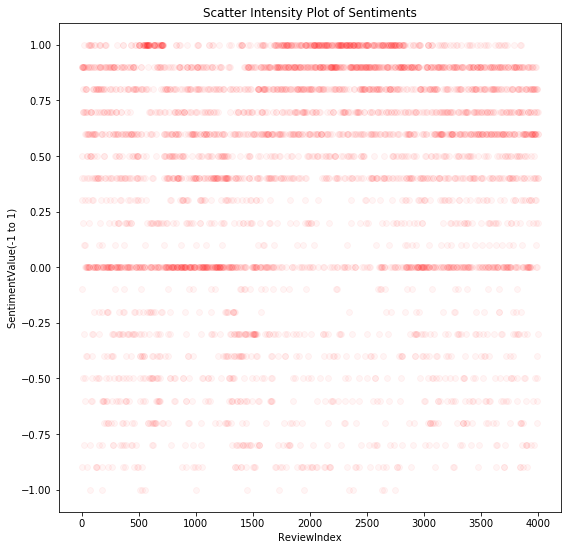

In [139]:
xaxis = []
for i in range(0,4000):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:4000]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()

In [140]:
testing = pd.pivot_table(temp_data,index=['Product Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing = testing.sort_values(by=('sum', 'Rating'), ascending = False)
testing.head(10)

sum               \
                                                   Rating Review Votes   
Product Name                                                             
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...   3683         2353   
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(96...   2140          543   
Apple - Iphone 5c A1532 Verizon 16 GB Cell Phon...   1670          580   
Apple - Iphone 5c A1532 Verizon 16 GB Cell Phon...   1188          412   
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...   1019          497   
Apple A1533 Unlocked iPhone 5S Smart Phone, 16 ...    564          180   
4 Inch Touch Screen Cell Phone Unlocked, Androi...    512          237   
"Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...    307          100   
Alcatel One Touch Fierce 2, 4GB, 5" Screen, Unl...    291           92   
[XMAS DEAL] Jethro [SC118] Simple Unlocked Quad...    269          178   

                                                                        mean  \
                                                   SENTIMENT_VALUE    Rating   
Product Name                                                                   
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...            3951  4.060639   
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(96...            2064  4.037736   
Apple - Iphone 5c A1532 Verizon 16 GB Cell Phon...            1789  3.786848   
Apple - Iphone 5c A1532 Verizon 16 GB Cell Phon...            1255  3.832258   
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...            1044  4.193416   
Apple A1533 Unlocked iPhone 5S Smart Phone, 16 ...             570  4.028571   
4 Inch Touch Screen Cell Phone Unlocked, Androi...             558  3.240506   
"Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...             294  4.205479   
Alcatel One Touch Fierce 2, 4GB, 5" Screen, Unl...             310  3.637500   
[XMAS DEAL] Jethro [SC118] Simple Unlocked Quad...             270  3.586667   

                                                                 \
                                                   Review Votes   
Product Name                                                      
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...     2.652762   
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(96...     1.083832   
Apple - Iphone 5c A1532 Verizon 16 GB Cell Phon...     1.387560   
Apple - Iphone 5c A1532 Verizon 16 GB Cell Phon...     1.364238   
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...     2.088235   
Apple A1533 Unlocked iPhone 5S Smart Phone, 16 ...     1.285714   
4 Inch Touch Screen Cell Phone Unlocked, Androi...     1.755556   
"Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...     1.369863   
Alcatel One Touch Fierce 2, 4GB, 5" Screen, Unl...     1.164557   
[XMAS DEAL] Jethro [SC118] Simple Unlocked Quad...     2.373333   

                                                                    
                                                   SENTIMENT_VALUE  
Product Name                                                        
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...        4.356119  
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(96...        3.894340  
Apple - Iphone 5c A1532 Verizon 16 GB Cell Phon...        4.056689  
Apple - Iphone 5c A1532 Verizon 16 GB Cell Phon...        4.048387  
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...        4.296296  
Apple A1533 Unlocked iPhone 5S Smart Phone, 16 ...        4.071429  
4 Inch Touch Screen Cell Phone Unlocked, Androi...        3.531646  
"Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...        4.027397  
Alcatel One Touch Fierce 2, 4GB, 5" Screen, Unl...        3.875000  
[XMAS DEAL] Jethro [SC118] Simple Unlocked Quad...        3.600000

In [141]:
#Sentiment Analysis on top 5 brands
samsung = []
blu = []
apple = []
lg = []
nokia = []



for i in range(0,4000):
    score = all_sent_values[i]
    brand = temp_data['Brand Name'][i]
    if (brand == 'Samsung'):
        samsung.append(score)
    elif (brand == 'BLU'):
        blu.append(score)
    elif (brand == 'Apple'):
        apple.append(score)
    elif (brand == 'LG'):
        lg.append(score)
    elif (brand == 'Nokia'):
        nokia.append(score)
    else:
        continue

In [142]:
list_of_brands = [samsung, blu, apple,lg,nokia]
name_of_brands = ['Samsung', 'BLU', 'Apple', 'LG', 'Nokia']

In [62]:
df = raw_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
Product Name    413840 non-null object
Brand Name      348669 non-null object
Price           407907 non-null float64
Rating          413840 non-null int64
Reviews         413778 non-null object
Review Votes    401544 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [63]:
#Descriptive Statistics of the dataset
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [64]:
#Selecting only the columns Reviews and Ratings for Consideration of Sentiment Analysis
df=df[['Reviews','Rating']]
df.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 2 columns):
Reviews    413778 non-null object
Rating     413840 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.3+ MB


In [66]:
#Data Preprocessing steps by elimination of the rows with missing values
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413778 entries, 0 to 413839
Data columns (total 2 columns):
Reviews    413778 non-null object
Rating     413778 non-null int64
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [67]:
#Elimination of rows with neutral sentiment since 3 is neither positive nor negative on a scale of 1 to 5.
df=df[df['Rating']!=3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382015 entries, 0 to 413839
Data columns (total 2 columns):
Reviews    382015 non-null object
Rating     382015 non-null int64
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [68]:
# Assignning Positive Rating > 3 as 1 and Negative Rating which is less than 3 as 0
df['sentiment']=np.where(df['Rating'] > 3, 1, 0)
df.head()

,Reviews,Rating,sentiment
0,I feel so LUCKY to have found this used (phone...,5,1
1,"nice phone, nice up grade from my pantach revu...",4,1
2,Very pleased,5,1
3,It works good but it goes slow sometimes but i...,4,1
4,Great phone to replace my lost phone. The only...,4,1


In [69]:
df.tail()

,Reviews,Rating,sentiment
413832,good rugged phone that has a long-lasting batt...,4,1
413834,used hard,1,0
413835,another great deal great price,5,1
413837,Passes every drop test onto porcelain tile!,5,1
413839,Only downside is that apparently Verizon no lo...,4,1


In [70]:
Cstopwords=set(stopwords.words('english')+list(punctuation))
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def clean_review(review_column):
    review_corpus=[]    
    review=review_column
    #review=BeautifulSoup(review,'lxml').text
    review=re.sub('[^a-zA-Z]',' ',review)
    review=str(review).lower()
    review=word_tokenize(review)
    #review=[stemmer.stem(w) for w in review if w not in Cstopwords]
    review=[lemma.lemmatize(w) for w in review ]
    review=' '.join(review)
    review_corpus.append(review)
    return review

In [71]:
review_column=df['Reviews']
# print(review_column)
review_corpus=review_column.apply(clean_review)

In [72]:
review_column

0         I feel so LUCKY to have found this used (phone...
1         nice phone, nice up grade from my pantach revu...
2                                              Very pleased
3         It works good but it goes slow sometimes but i...
4         Great phone to replace my lost phone. The only...
5         I already had a phone with problems... I know ...
6         The charging port was loose. I got that solder...
7         Phone looks good but wouldn't stay charged, ha...
8         I originally was using the Samsung S2 Galaxy f...
11        This is a great product it came after two days...
12        These guys are the best! I had a little situat...
13        I'm really disappointed about my phone and ser...
14        Ordered this phone as a replacement for the sa...
15        Had this phone before and loved it but was not...
16        I was able to get the phone I previously owned...
17        I brought this phone as a replacement for my d...
18        I love the phone. It does ever

In [73]:
df['clean_reviews'] = review_corpus

In [74]:
df['clean_reviews'].head(10)

0     i feel so lucky to have found this used phone ...
1     nice phone nice up grade from my pantach revue...
2                                          very pleased
3     it work good but it go slow sometimes but it a...
4     great phone to replace my lost phone the only ...
5     i already had a phone with problem i know it s...
6     the charging port wa loose i got that soldered...
7     phone look good but wouldn t stay charged had ...
8     i originally wa using the samsung s galaxy for...
11    this is a great product it came after two day ...
Name: clean_reviews, dtype: object

In [75]:
df['clean_reviews']=review_corpus
df.tail(20)

,Reviews,Rating,sentiment,clean_reviews
413815,"This phone is simple, very good , and it works...",5,1,this phone is simple very good and it work exc...
413816,Good sturdy phone for a pre-teen to have avail...,4,1,good sturdy phone for a pre teen to have avail...
413817,This is the second junk Convoy I have owned. T...,1,0,this is the second junk convoy i have owned th...
413819,I BOUGHT THIS PHONE FOR MY HUSBAND AND HE LOVE...,5,1,i bought this phone for my husband and he love...
413820,They said phone was normal wear but it was a l...,1,0,they said phone wa normal wear but it wa a lie...
413821,"You could shoot this out of a potato gun, and ...",5,1,you could shoot this out of a potato gun and p...
413822,Bought this for my mother and she loves it. Gr...,5,1,bought this for my mother and she love it grea...
413823,"Excellent phone, as advertised. Love the push-...",5,1,excellent phone a advertised love the push to ...
413824,works great and picks up signal in place my ot...,4,1,work great and pick up signal in place my othe...
413825,"Great phone. Large keys, best flip phone I hav...",5,1,great phone large key best flip phone i have o...


In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
cv=CountVectorizer(max_features=20000,min_df=5,ngram_range=(1,2))

In [78]:
X1=cv.fit_transform(df['clean_reviews'])
X1.shape

(382015, 20000)

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
tfidf=TfidfVectorizer(min_df=5, max_df=0.95, max_features = 20000, ngram_range = ( 1, 2 ),
                              sublinear_tf = True)

In [81]:
tfidf=tfidf.fit(df['clean_reviews'])

In [82]:
X2=tfidf.transform(df['clean_reviews'])
X2.shape

(382015, 20000)

In [83]:
y=df['sentiment'].values
y.shape

(382015,)

In [85]:
X = X2
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(305612, 20000) (305612,)
(76403, 20000) (76403,)


In [86]:
print('Mean positive review in train : {0:.3f}'.format(np.mean(y_train)))
print('mean positive review in test : {0:.3f}'.format(np.mean(y_test)))

Mean positive review in train : 0.746
mean positive review in test : 0.745


In [87]:
#Implementing Logistic Based Regression model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression as lr
model_lr=lr(random_state=0)
model_lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)
print('Accuracy for Logistic Regression :',accuracy_score(y_test,y_pred_lr))
print('Confusion matrix for Logistic Regression:\n',confusion_matrix(y_test,y_pred_lr))
print('F1 score for Logistic Regression :',f1_score(y_test,y_pred_lr))
print('Precision score for Logistic Regression :',precision_score(y_test,y_pred_lr))
print('recall score for Logistic Regression :',recall_score(y_test,y_pred_lr))
print('AUC: ', roc_auc_score(y_test, y_pred_lr))

C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for Logistic Regression : 0.9623444105597948
Confusion matrix for Logistic Regression:
 [[17833  1632]
 [ 1245 55693]]
F1 score for Logistic Regression : 0.9748212457225874
Precision score for Logistic Regression : 0.9715307457479285
recall score for Logistic Regression : 0.978134110787172
AUC:  0.9471456580136735


In [88]:
feature_names = np.array(cv.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model_lr.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'worst' 'disappointed' 'not happy' 'poor' 'terrible' 'doesn'
 'horrible' 'useless' 'return']

Largest Coefs: 
['great' 'love' 'excellent' 'perfect' 'no problem' 'amazing' 'awesome'
 'best' 'love this' 'not bad']


In [90]:
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB()
model_nb.fit(X_train,y_train)
y_pred_nb=model_nb.predict(X_test)
y_te_nb= model_nb.predict(X_test[6]) 
print('accuracy for Naive Bayes Classifier :',accuracy_score(y_test,y_pred_nb))
print('confusion matrix for Naive Bayes Classifier:\n',confusion_matrix(y_test,y_pred_nb))
print('F1 score for Logistic Regression :',f1_score(y_test,y_pred_nb))
print('Precision score for Logistic Regression :',precision_score(y_test,y_pred_nb))
print('recall score for Logistic Regression :',recall_score(y_test,y_pred_nb))
print('AUC: ', roc_auc_score(y_test, y_pred_nb))

accuracy for Naive Bayes Classifier : 0.9368480295276364
confusion matrix for Naive Bayes Classifier:
 [[16687  2778]
 [ 2047 54891]]
F1 score for Logistic Regression : 0.9578996047361854
Precision score for Logistic Regression : 0.9518285387296468
recall score for Logistic Regression : 0.9640486142822017
AUC:  0.9106654579245582


In [91]:
# get the feature names as numpy array
feature_names = np.array(cv.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model_nb.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst purchase' 'never recommend' 'total waste' 'nothing work' 'is scam'
 'royalty' 'reported stolen' 'zero star' 'very dissapointed'
 'started freezing']

Largest Coefs: 
['good' 'great' 'phone' 'it' 'excellent' 'the' 'and' 'love' 'very' 'is']


In [92]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred_rf=model_rf.predict(X_test)
print('accuracy for Random Forest Classifier :',accuracy_score(y_test,y_pred_rf))
print('confusion matrix for Random Forest Classifier:\n',confusion_matrix(y_test,y_pred_rf))
print('F1 score for Logistic Regression :',f1_score(y_test,y_pred_rf))
print('Precision score for Logistic Regression :',precision_score(y_test,y_pred_rf))
print('recall score for Logistic Regression :',recall_score(y_test,y_pred_rf))
print('AUC: ', roc_auc_score(y_test, y_pred_rf))

C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy for Random Forest Classifier : 0.9700404434380849
confusion matrix for Random Forest Classifier:
 [[18211  1254]
 [ 1035 55903]]
F1 score for Logistic Regression : 0.979937771155616
Precision score for Logistic Regression : 0.9780604300435642
recall score for Logistic Regression : 0.9818223330640345
AUC:  0.9586995045746579


In [93]:
feature_names = np.array(cv.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model_rf.feature_importances_.argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['netflix and' 'them my' 'iphone on' 'them or' 'them with' 'changing the'
 'quality are' 'them you' 'io is' 'into your']

Largest Coefs: 
['not' 'great' 'good' 'love' 'wa' 'not work' 'bad' 'off' 'stopped'
 'the phone']


In [94]:
from sklearn.svm import SVC

In [95]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train[:1000], y_train[:1000])
 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [96]:
y_pred = svclassifier.predict(X_test) 

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8895723989895685

In [98]:
print(X_train[0:10], y_train[:10])

  (0, 4189)	0.19066610289090843
  (0, 4200)	0.35393425160445785
  (0, 4929)	0.19170088526723217
  (0, 5422)	0.2102865633526799
  (0, 5438)	0.3351511739599854
  (0, 7631)	0.3338910149125132
  (0, 8192)	0.13679239642052418
  (0, 8279)	0.277927441994642
  (0, 8593)	0.2103376632465459
  (0, 12126)	0.22779691714890357
  (0, 12128)	0.3523084498647587
  (0, 19302)	0.11447225624148474
  (0, 19345)	0.3483264313797539
  (0, 19533)	0.12897596868115876
  (0, 19586)	0.25752157191148206
  (1, 652)	0.051845029624850075
  (1, 1890)	0.09141568230578626
  (1, 1904)	0.2578335122225558
  (1, 2223)	0.1277044107717307
  (1, 2232)	0.24508087207423704
  (1, 2548)	0.1222028402577216
  (1, 2577)	0.18709532227304748
  (1, 2927)	0.08961284673442671
  (1, 2938)	0.15336435458710543
  (1, 3113)	0.12022515371308896
  :	:
  (8, 17931)	0.17031783572487863
  (8, 18173)	0.08147410269607652
  (8, 18197)	0.17473051320910135
  (8, 18414)	0.04798182696076989
  (8, 18454)	0.1484082471401378
  (8, 18749)	0.11305340946846716
  